In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* **IN THIS NOTEBOOK WE DEMONSTRIATE BANK CHURN PREDICTION USING LOGESTIC REGRASION AND RANDOM FOREST CLASIFIER **

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df2=df.iloc[:,2:] 
df2.head()

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0  Hargrave          619    France  Female   42       2       0.00   
1      Hill          608     Spain  Female   41       1   83807.86   
2      Onio          502    France  Female   42       8  159660.80   
3      Boni          699    France  Female   39       1       0.00   
4  Mitchell          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0

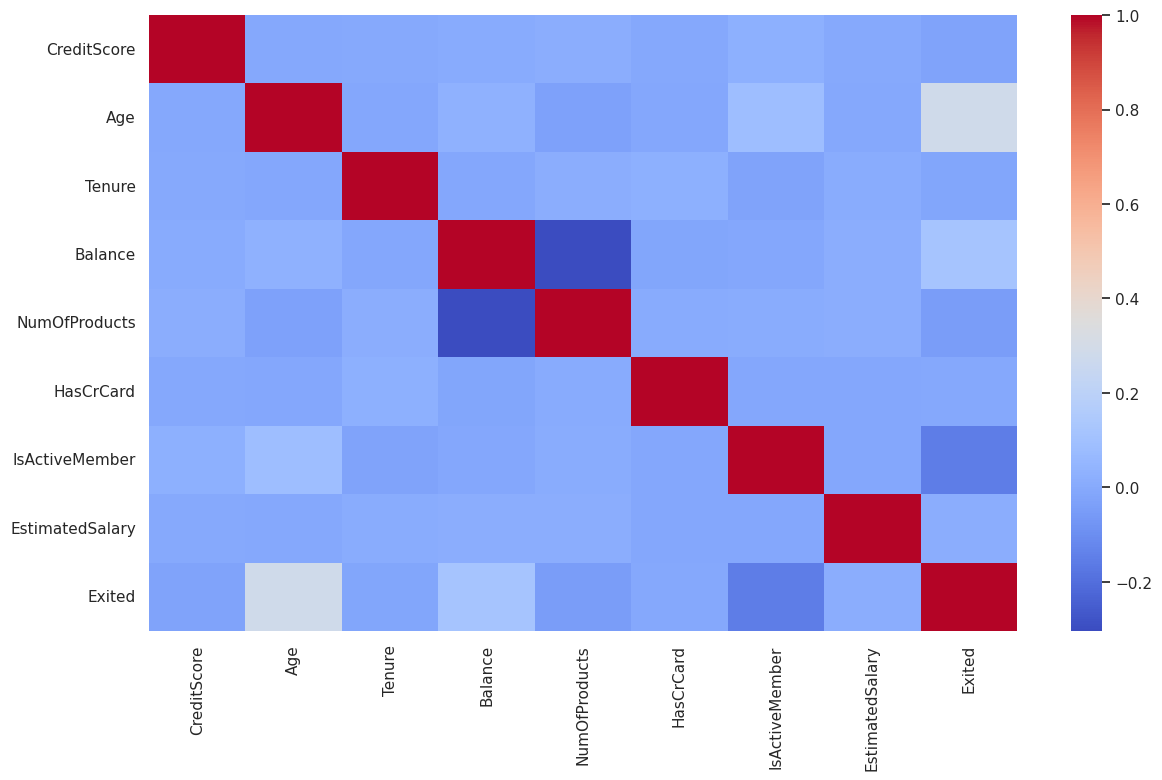

In [7]:
plt.figure(figsize=(14,8))
sns.set_theme(style='white')
cor=df2.corr()
heatmap = sns.heatmap(cor, cmap='coolwarm')


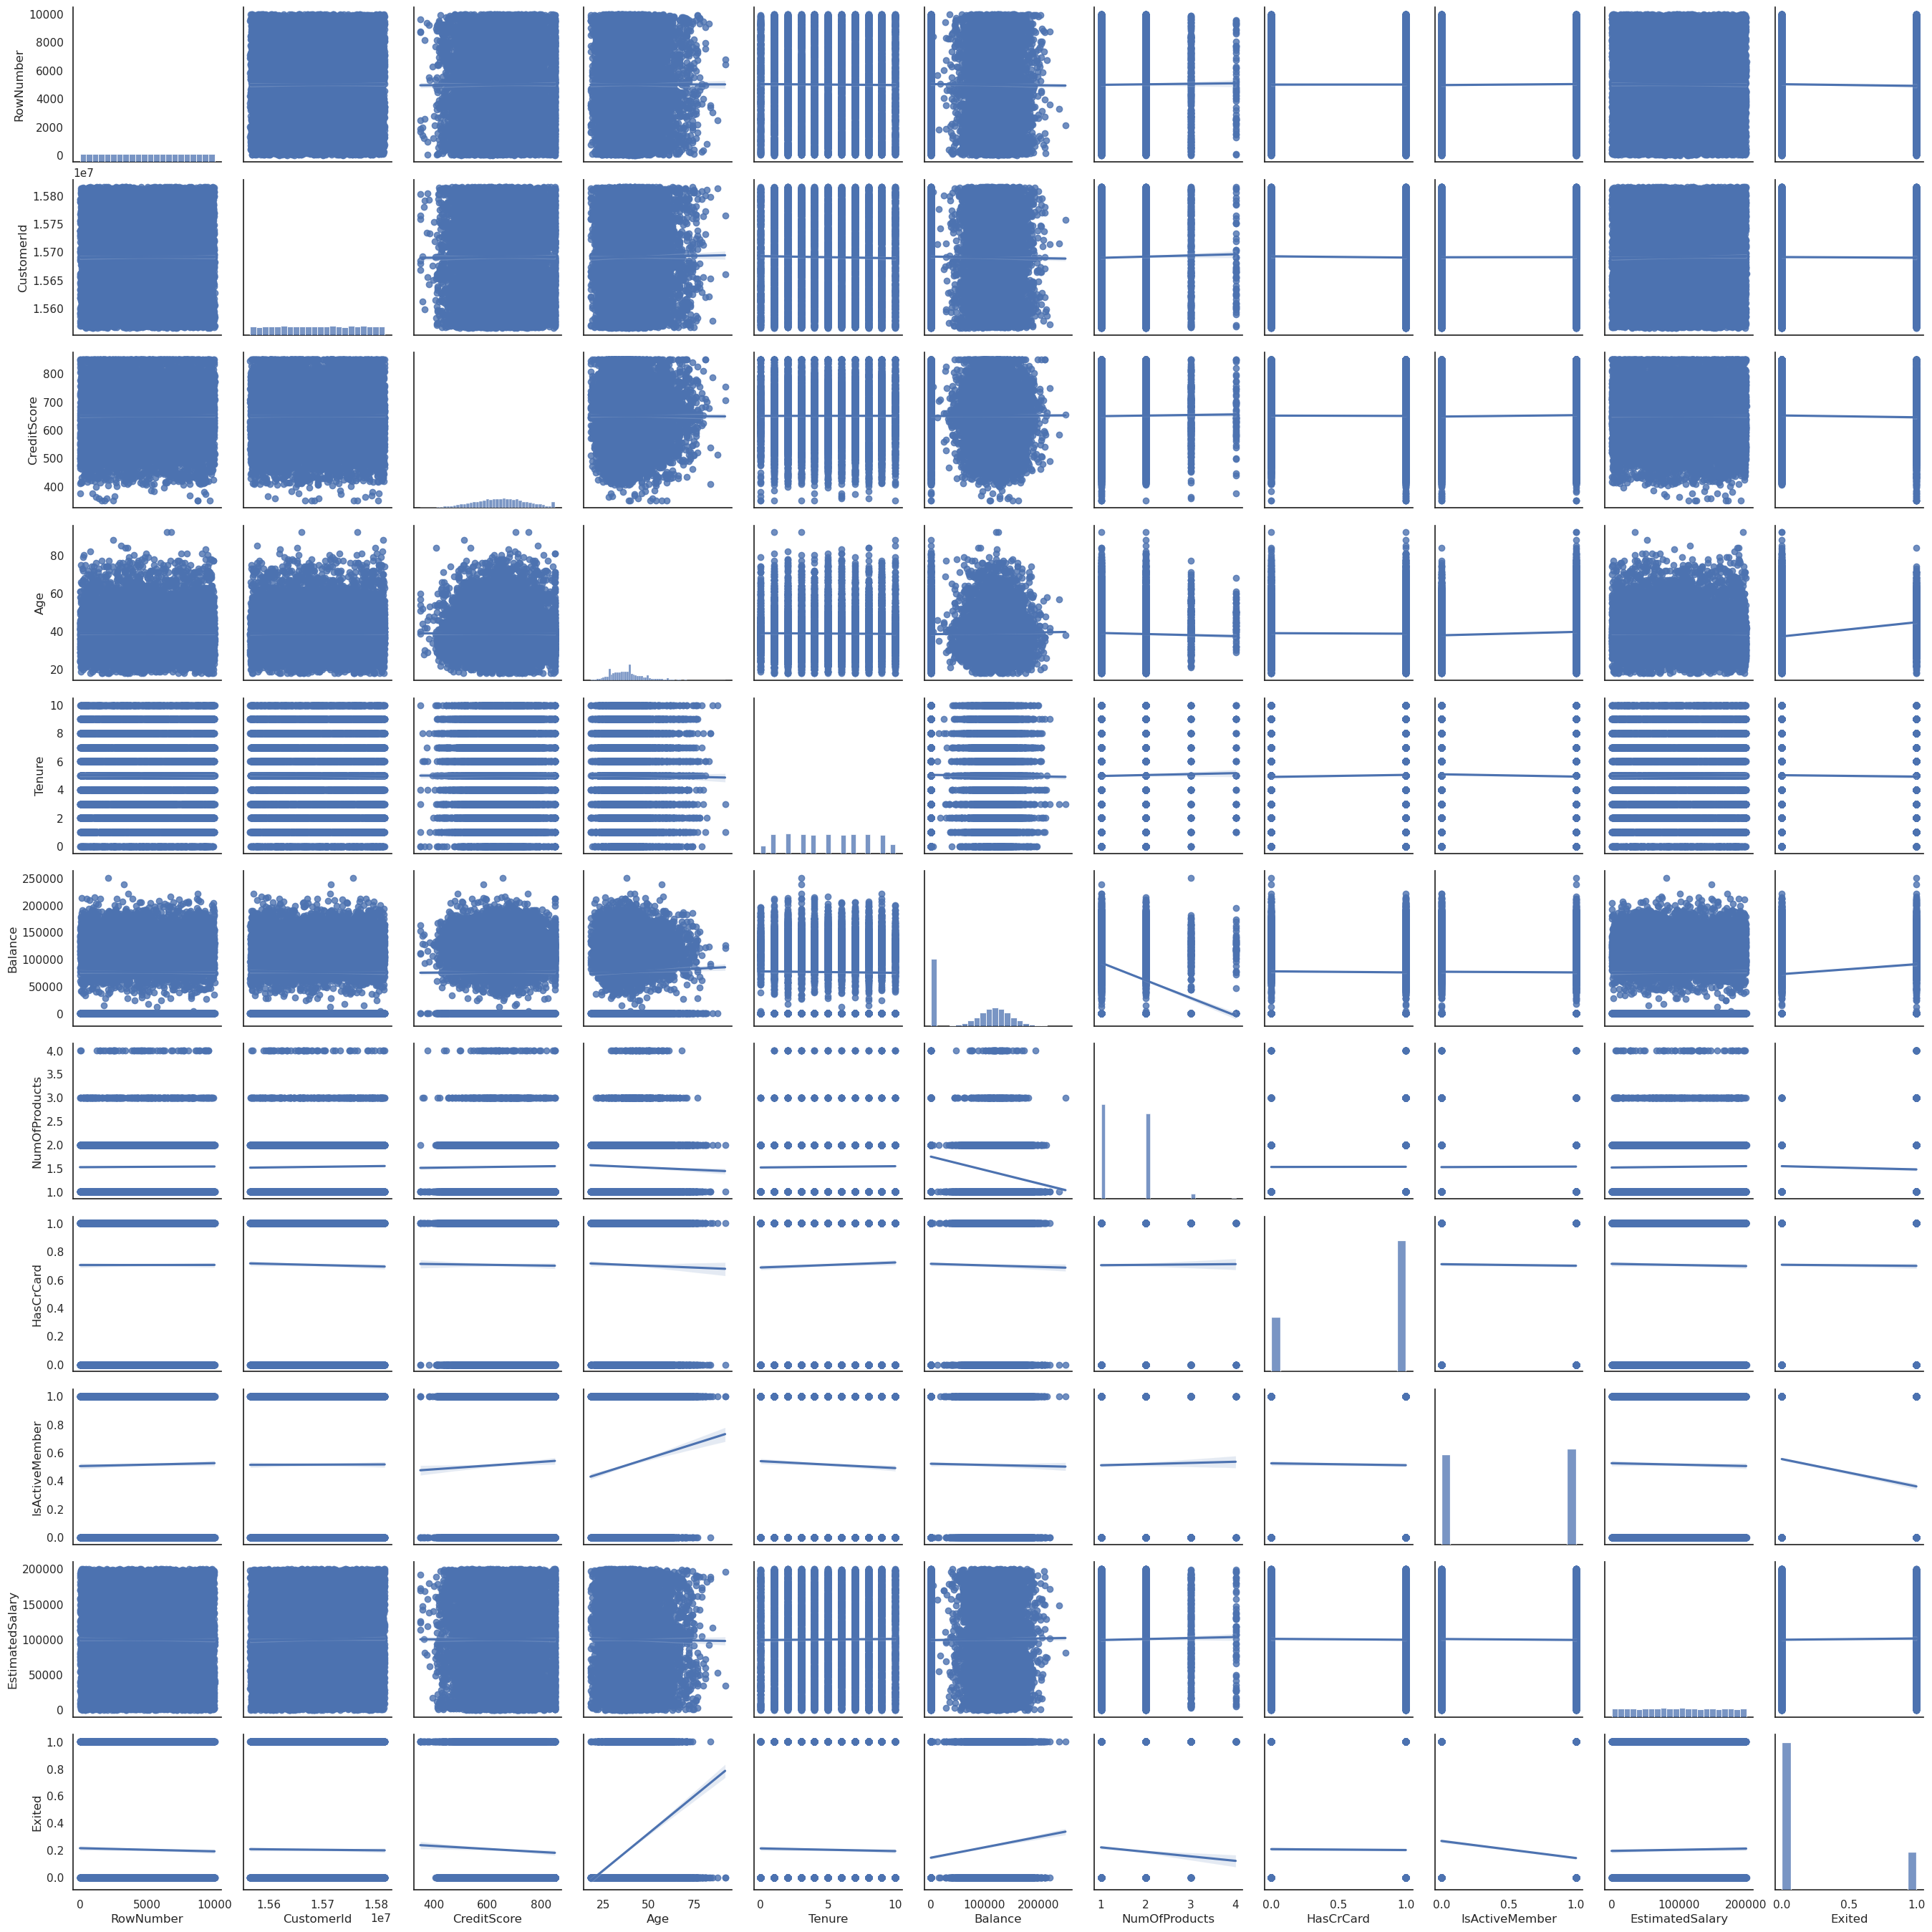

In [8]:
sns.pairplot(df, kind="reg")

In [9]:
dummy_df= pd.get_dummies(df2)
dummy_df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Surname_Abazu  ...  \
0                  1        101348.88       1              0  ...   
1                  1        112542.58       0              0  ...   
2                  0        113931.57       1              0  ...   
3                  0         93826.63       0              0  ...   
4                  1         79084.10       0              0  ...   
...              ...              ...     ...            ...  ...   
9995               0         96270.64       0              0  ...   
9996               1        101699.77       0              0  ...   
9997               1         42085.58       1              0  ...   
9998               0         92888.52       1              0  ...   
9999               0         38190.78       0              0  ...   

      Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                   0                 0             0              0   
1                   0                 0             0              0   
2                   0                 0             0              0   
3                   0                 0             0              0   
4                   0                 0             0              0   
...               ...               ...           ...            ...   
9995                0                 0             0              0   
9996                0                 0             0              0   
9997                0                 0             0              0   
9998                0                 0             0              0   
9999                0                 0             0              0   

      Surname_Zuyeva  Geography_France  Geography_Germany  Geography_Spain  \
0                  0                 1                  0                0   
1                  0                 0                  0                1   
2                  0                 1                  0                0   
3                  0                 1                  0                0   
4                  0                 0                  0                1   
...              ...               ...                ...              ...   
9995               0                 1                  0                0   
9996               0                 1                  0                0   
9997               0                 1                  0                0   
9998               0                 0                  1                0   
9999               0                 1                  0                0   

      Gender_Female  Gender_Male  
0                 1            0  
1                 1            0  
2                 1            0  
3                 1            0  
4                 1            0  
...             ...          ...  
9995              0            1  
9996              0            1  
9997              1            0  
9998              0            1  
9999              1            0  

[10000 rows x 2946 columns]

In [10]:
X = df2[['Age','Tenure','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df2['Exited']
X

Age  Tenure  HasCrCard  IsActiveMember  EstimatedSalary
0      42       2          1               1        101348.88
1      41       1          0               1        112542.58
2      42       8          1               0        113931.57
3      39       1          0               0         93826.63
4      43       2          1               1         79084.10
...   ...     ...        ...             ...              ...
9995   39       5          1               0         96270.64
9996   35      10          1               1        101699.77
9997   36       7          0               1         42085.58
9998   42       3          1               0         92888.52
9999   28       4          1               0         38190.78

[10000 rows x 5 columns]

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mm = MinMaxScaler()

In [13]:
X=pd.DataFrame(mm.fit_transform(X))
X

0    1    2    3         4
0     0.324324  0.2  1.0  1.0  0.506735
1     0.310811  0.1  0.0  1.0  0.562709
2     0.324324  0.8  1.0  0.0  0.569654
3     0.283784  0.1  0.0  0.0  0.469120
4     0.337838  0.2  1.0  1.0  0.395400
...        ...  ...  ...  ...       ...
9995  0.283784  0.5  1.0  0.0  0.481341
9996  0.229730  1.0  1.0  1.0  0.508490
9997  0.243243  0.7  0.0  1.0  0.210390
9998  0.324324  0.3  1.0  0.0  0.464429
9999  0.135135  0.4  1.0  0.0  0.190914

[10000 rows x 5 columns]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

In [15]:
logreg=LogisticRegression()

In [16]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [17]:
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

In [18]:
res=np.abs(y_train,yhat_train)
print(pd.Series(res).value_counts())
print((pd.Series(res).value_counts(normalize = True)))

0    5944
1    1556
Name: Exited, dtype: int64
0    0.792533
1    0.207467
Name: Exited, dtype: float64


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confu_matrix=confusion_matrix(y_test,yhat_test)
confu_matrix

array([[1974,   45],
       [ 417,   64]])

In [21]:
import itertools

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1974   45]
 [ 417   64]]


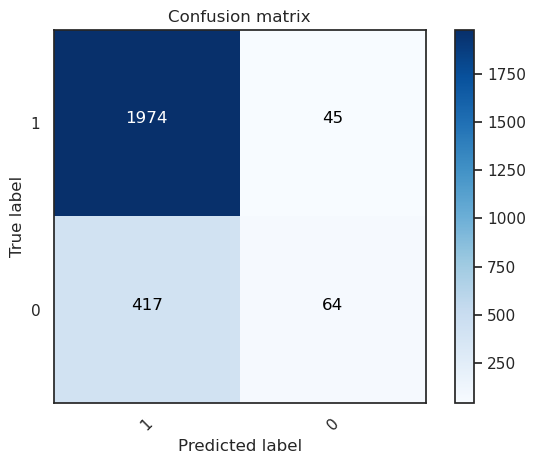

In [23]:
labeles=['1','0']
plot_confusion_matrix(confu_matrix,labeles,normalize=False)

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [25]:
precision_train = precision_score(y_train, yhat_train)
precision_test = precision_score(y_test, yhat_test)
accuracy_train = accuracy_score(y_train, yhat_train)
accuracy_test = accuracy_score(y_test, yhat_test)
f1_train = f1_score(y_train, yhat_train)
f1_test = f1_score(y_test, yhat_test)
print(f'precision score :{precision_test*100}%')
print(f'acuracy score :{accuracy_test*100}%')
print(f'f1 score :{f1_test*100}%')


precision score :58.71559633027523%
acuracy score :81.52000000000001%
f1 score :21.694915254237287%


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
yhat_train1 = model.predict(X_train)
yhat_test1 = model.predict(X_test)

In [29]:
res=np.abs(y_train,yhat_train1)
print(pd.Series(res).value_counts())
print((pd.Series(res).value_counts(normalize = True)))

0    5944
1    1556
Name: Exited, dtype: int64
0    0.792533
1    0.207467
Name: Exited, dtype: float64


In [30]:
confu_matrix=confusion_matrix(y_test,yhat_test1)
confu_matrix

array([[1854,  165],
       [ 334,  147]])

Confusion matrix, without normalization
[[1854  165]
 [ 334  147]]


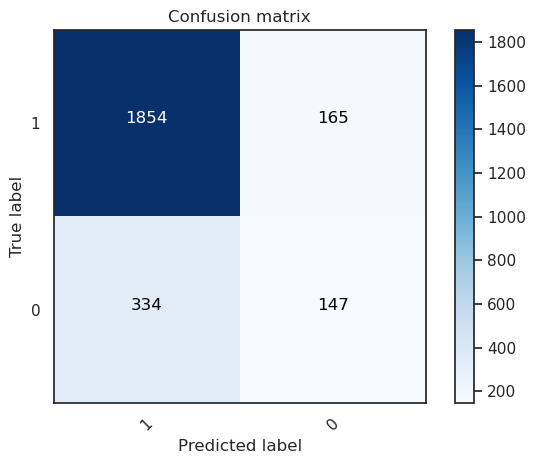

In [31]:
labeles=['1','0']
plot_confusion_matrix(confu_matrix,labeles,normalize=False)

In [32]:
precision_train = precision_score(y_train, yhat_train1)
precision_test = precision_score(y_test, yhat_test1)
accuracy_train = accuracy_score(y_train, yhat_train1)
accuracy_test = accuracy_score(y_test, yhat_test1)
f1_train = f1_score(y_train, yhat_train1)
f1_test = f1_score(y_test, yhat_test1)
print(f'precision score :{precision_test*100}%')
print(f'acuracy score :{accuracy_test*100}%')
print(f'f1 score :{f1_test*100}%')


precision score :47.11538461538461%
acuracy score :80.04%
f1 score :37.07440100882724%


WE GOT BETER F1 SCORE IN RANDOM FOREST CLASIFIER BUT LESS PRECISION COMPARED TO LOGESTIC REGGRESION 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0592701 to fit


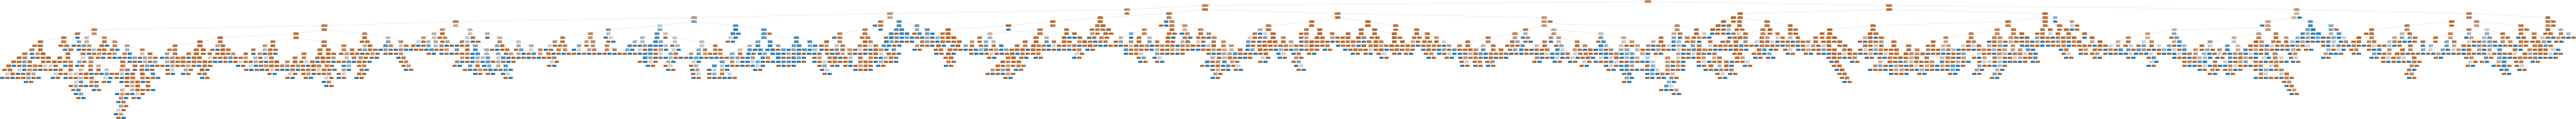

In [33]:
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')